
# Law Replication: Laminar Flame Speeds and Burning Fluxes of H2-Air @100 Atm

This Script Computes a Cantera 1D-Flame, and extracts laminar flame speeds, burning fluxes, species mass fractions for comparison.

We use the Burke Mechanism, and modify it with our own Parameter fits obtained from evaluating CoolProps Thermo Data for each species

Burke Mechanism: \
https://burke.me.columbia.edu/sites/burke.me.columbia.edu/files/content/chem_cti.txt \
Dont forget to use "cti2yaml" to convert the downloaded chem_cti to a Cantera readable YAML file!  \

WebPlotDigitizer: \
https://apps.automeris.io/wpd4/

In [2]:
import cantera as ct
import numpy as np
import matplotlib.pyplot as plt

First we import the Burke YAML as a gas object, its in terms of thermodynamic species description its identical to gri30

In [3]:
gas1 = ct.Solution('Burke Mech/Burke_chem_cti.yaml') #Burke Mech is saved in a subfolder

Now we set the Flame Characteristics, then solve the flame

In [7]:
fuel = 'H2:1'
oxidizer = 'O2:0.21,N2:0.79'
gas1.set_equivalence_ratio(1.4, fuel, oxidizer) #Composition
gas1.TP = 300, 101325 # Room Temperature, 1 atm

flame1 = ct.FreeFlame(gas1, width=0.03)
flame1.set_refine_criteria(ratio=3, slope=0.06, curve=0.11)
loglevel = 1 # amount of diagnostic output
#flame.show()

In [11]:
# Solve with mixture averaged transort model 
flame1.transport_model='mixture-averaged'

flame1.solve(loglevel=loglevel, auto=True)
Su0 = flame1.velocity[0]
mdot0 = flame1.density[0] * flame1.velocity[0] 
print(f"Mixture-averaged flamespeed is: {Su0 :.2f} m/s")
print(f"Burning Flux is: {mdot0 :.2f} kg/m2s")
output= "adiabatic_flame.yaml"
#flame.save(output,description='mixture-averaged')



*********** Solving on 152 point grid with energy equation enabled ***********

..............................................................................

Attempt Newton solution of steady-state problem.
Newton steady-state solve failed.

Attempt 10 timesteps.
Final timestep info: dt= 6.328e-06  log(ss)= 7.477     

Attempt Newton solution of steady-state problem.
Newton steady-state solve failed.

Attempt 10 timesteps.
Final timestep info: dt= 2.136e-05  log(ss)= 6.485     

Attempt Newton solution of steady-state problem.
Newton steady-state solve failed.

Attempt 10 timesteps.
Final timestep info: dt= 0.0003649  log(ss)= 4.806     

Attempt Newton solution of steady-state problem.
Newton steady-state solve succeeded.

Problem solved on [152] point grid(s).

..............................................................................
grid refinement disabled.

******************** Solving with grid refinement enabled ********************

.....................................

Works well, now to compare different thermo models!

In [12]:
phi = np.linspace(1.0,2.1, 23)
print (phi)

fuel = 'H2:1'
oxidizer = 'O2:0.21,N2:0.79'
loglevel = 0 # amount of diagnostic output

[1.   1.05 1.1  1.15 1.2  1.25 1.3  1.35 1.4  1.45 1.5  1.55 1.6  1.65
 1.7  1.75 1.8  1.85 1.9  1.95 2.   2.05 2.1 ]


In [14]:
gas_ideal = ct.Solution('Burke Mech/Burke_chem_cti.yaml')
Su_ideal = []
mdot_ideal = []
#Ideal Case
for i in phi:
    gas_ideal.TP = 300, 10132500 # Room Temperature, 100 atm
    gas_ideal.set_equivalence_ratio(i, fuel, oxidizer)
    flameA = ct.FreeFlame(gas_ideal, width=0.03)
    flameA.set_refine_criteria(ratio=3, slope=0.06, curve=0.11)
    flameA.transport_model='mixture-averaged'
    flameA.solve(loglevel=loglevel, auto=True)
    Su0 = flameA.velocity[0]*100 #cm/s
    mdot0 = flameA.density[0] * flameA.velocity[0] / 1000 #g/cm2
    print(f"Mixture-averaged flamespeed is: {Su0 :.2f} cm/s @phi {i}")
    print(f"Burning Flux is: {mdot0 :.2f} g/m2s @phi {i}")
    Su_ideal.append (Su0)
    mdot_ideal.append (mdot0)

Mixture-averaged flamespeed is: 41.69 cm/s @phi 1.0
Burning Flux is: 0.04 g/m2s @phi 1.0
Mixture-averaged flamespeed is: 49.12 cm/s @phi 1.05
Burning Flux is: 0.04 g/m2s @phi 1.05
Mixture-averaged flamespeed is: 56.78 cm/s @phi 1.1
Burning Flux is: 0.05 g/m2s @phi 1.1
Mixture-averaged flamespeed is: 63.36 cm/s @phi 1.15
Burning Flux is: 0.05 g/m2s @phi 1.15
Mixture-averaged flamespeed is: 68.69 cm/s @phi 1.2
Burning Flux is: 0.06 g/m2s @phi 1.2
Mixture-averaged flamespeed is: 72.72 cm/s @phi 1.25
Burning Flux is: 0.06 g/m2s @phi 1.25
Mixture-averaged flamespeed is: 75.82 cm/s @phi 1.3
Burning Flux is: 0.06 g/m2s @phi 1.3
Mixture-averaged flamespeed is: 77.90 cm/s @phi 1.35
Burning Flux is: 0.06 g/m2s @phi 1.35
Mixture-averaged flamespeed is: 79.01 cm/s @phi 1.4
Burning Flux is: 0.06 g/m2s @phi 1.4
Mixture-averaged flamespeed is: 79.64 cm/s @phi 1.45
Burning Flux is: 0.06 g/m2s @phi 1.45
Mixture-averaged flamespeed is: 79.74 cm/s @phi 1.5
Burning Flux is: 0.06 g/m2s @phi 1.5
Mixture-ave

In [17]:
gas_multicomponent = ct.Solution('Burke Mech/Burke_chem_cti.yaml')
Su_multicomponent = []
mdot_multicomponent = []

#R-K Case
for i in phi:
    gas_RK.TP = 300, 10132500 # Room Temperature, 100 atm
    gas_RK.set_equivalence_ratio(i, fuel, oxidizer)
    flameB = ct.FreeFlame(gas_RK, width=0.03)
    flameB.set_refine_criteria(ratio=3, slope=0.06, curve=0.11)
    flameB.transport_model = 'multicomponent'
    flameB.solve(loglevel=loglevel, auto=True)
    Su0 = flameB.velocity[0]*100
    mdot0 = flameB.density[0] * flameB.velocity[0] / 1000 #g/cm2
    print(f"Multi-Component flamespeed is: {Su0 :.2f} cm/s @phi {i}")
    print(f"Burning Flux is: {mdot0 :.2f} g/m2s @phi {i}")
    Su_multicomponent.append (Su0)
    mdot_multicomponent.append (mdot0)

Multi-Component flamespeed is: 43.27 cm/s @phi 1.0
Burning Flux is: 0.04 g/m2s @phi 1.0
Multi-Component flamespeed is: 50.72 cm/s @phi 1.05
Burning Flux is: 0.04 g/m2s @phi 1.05
Multi-Component flamespeed is: 58.28 cm/s @phi 1.1
Burning Flux is: 0.05 g/m2s @phi 1.1
Multi-Component flamespeed is: 64.66 cm/s @phi 1.15
Burning Flux is: 0.05 g/m2s @phi 1.15
Multi-Component flamespeed is: 69.79 cm/s @phi 1.2
Burning Flux is: 0.06 g/m2s @phi 1.2
Multi-Component flamespeed is: 73.67 cm/s @phi 1.25
Burning Flux is: 0.06 g/m2s @phi 1.25
Multi-Component flamespeed is: 76.59 cm/s @phi 1.3
Burning Flux is: 0.06 g/m2s @phi 1.3
Multi-Component flamespeed is: 78.53 cm/s @phi 1.35
Burning Flux is: 0.06 g/m2s @phi 1.35
Multi-Component flamespeed is: 79.54 cm/s @phi 1.4
Burning Flux is: 0.06 g/m2s @phi 1.4
Multi-Component flamespeed is: 80.10 cm/s @phi 1.45
Burning Flux is: 0.06 g/m2s @phi 1.45
Multi-Component flamespeed is: 80.13 cm/s @phi 1.5
Burning Flux is: 0.06 g/m2s @phi 1.5
Multi-Component flames

In [18]:
Su_diff = []

print (Su_RK)
print (Su_ideal)

for a, b in zip(Su_RK, Su_ideal):
    Su_diff.append(a - b)
print (Su_diff)

[np.float64(43.27118914803554), np.float64(50.72040167430316), np.float64(58.275963071721925), np.float64(64.65736479237398), np.float64(69.79105348951609), np.float64(73.67013339576106), np.float64(76.58642899830005), np.float64(78.53497419505082), np.float64(79.540266195892), np.float64(80.09586342553969), np.float64(80.13380905709712), np.float64(79.7792872506265), np.float64(78.9660987634777), np.float64(78.0052379243548), np.float64(77.31191019644187), np.float64(75.80804395036384), np.float64(74.1428169599305), np.float64(72.22540115314962), np.float64(70.2546872765443), np.float64(68.14212410743103), np.float64(65.81196856347411), np.float64(63.568566546096136), np.float64(61.338357851376536)]
[np.float64(41.68802672275122), np.float64(49.118204748955854), np.float64(56.782416911777425), np.float64(63.35607541931891), np.float64(68.69293969062265), np.float64(72.72446296718628), np.float64(75.82299444808525), np.float64(77.90418446318145), np.float64(79.01360413681763), np.float

In [21]:
gas_multiSoret = ct.Solution('Burke Mech/Burke_chem_cti.yaml')
Su_multiSoret = []
mdot_multiSoret = []

#R-K Case
for i in phi:
    gas_RK.TP = 300, 10132500 # Room Temperature, 100 atm
    gas_RK.set_equivalence_ratio(i, fuel, oxidizer)
    flameB = ct.FreeFlame(gas_RK, width=0.03)
    flameB.set_refine_criteria(ratio=3, slope=0.06, curve=0.11)
    flameB.transport_model = 'multicomponent'
    flameB.soret_enabled = True
    flameB.solve(loglevel=loglevel, auto=True)
    Su0 = flameB.velocity[0]*100
    print(f"Mixture-averaged flamespeed is: {Su0 :.2f} cm/s @phi {i}")
    Su_multiSoret.append (Su0)
    mdot_multiSoret.append (mdot0)

Mixture-averaged flamespeed is: 41.67 cm/s @phi 1.0
Mixture-averaged flamespeed is: 48.22 cm/s @phi 1.05
Mixture-averaged flamespeed is: 55.22 cm/s @phi 1.1
Mixture-averaged flamespeed is: 62.04 cm/s @phi 1.15
Mixture-averaged flamespeed is: 66.43 cm/s @phi 1.2
Mixture-averaged flamespeed is: 70.01 cm/s @phi 1.25
Mixture-averaged flamespeed is: 72.73 cm/s @phi 1.3
Mixture-averaged flamespeed is: 74.57 cm/s @phi 1.35
Mixture-averaged flamespeed is: 75.75 cm/s @phi 1.4
Mixture-averaged flamespeed is: 76.32 cm/s @phi 1.45
Mixture-averaged flamespeed is: 76.42 cm/s @phi 1.5
Mixture-averaged flamespeed is: 76.24 cm/s @phi 1.55
Mixture-averaged flamespeed is: 75.54 cm/s @phi 1.6
Mixture-averaged flamespeed is: 74.70 cm/s @phi 1.65
Mixture-averaged flamespeed is: 73.51 cm/s @phi 1.7000000000000002
Mixture-averaged flamespeed is: 72.07 cm/s @phi 1.75
Mixture-averaged flamespeed is: 70.24 cm/s @phi 1.8
Mixture-averaged flamespeed is: 68.61 cm/s @phi 1.85
Mixture-averaged flamespeed is: 66.81 cm

In [11]:
gas_RK3 = ct.Solution('h2o2.yaml', thermo='ideal-gas')
Su_RK3 = []
#R-K Case
for i in phi:
    gas_RK3.TP = 300, 10132500 # Room Temperature, 100 atm
    gas_RK3.set_equivalence_ratio(i, fuel, oxidizer)
    flameB = ct.FreeFlame(gas_RK3, width=0.03)
    flameB.set_refine_criteria(ratio=3, slope=0.06, curve=0.11)
    flameB.transport_model = 'mixture-averaged'
    flameB.solve(loglevel=loglevel, auto=True)
    Su0 = flameB.velocity[0]*100
    print(f"Mixture-averaged flamespeed is: {Su0 :.2f} cm/s @phi {i}")
    Su_RK3.append (Su0)

Mixture-averaged flamespeed is: 26.63 cm/s @phi 1.0
Mixture-averaged flamespeed is: 31.39 cm/s @phi 1.05
Mixture-averaged flamespeed is: 37.39 cm/s @phi 1.1
Mixture-averaged flamespeed is: 42.11 cm/s @phi 1.15
Mixture-averaged flamespeed is: 45.71 cm/s @phi 1.2
Mixture-averaged flamespeed is: 48.54 cm/s @phi 1.25
Mixture-averaged flamespeed is: 50.59 cm/s @phi 1.3
Mixture-averaged flamespeed is: 52.02 cm/s @phi 1.35
Mixture-averaged flamespeed is: 52.98 cm/s @phi 1.4
Mixture-averaged flamespeed is: 53.41 cm/s @phi 1.45
Mixture-averaged flamespeed is: 53.47 cm/s @phi 1.5
Mixture-averaged flamespeed is: 53.18 cm/s @phi 1.55
Mixture-averaged flamespeed is: 52.68 cm/s @phi 1.6
Mixture-averaged flamespeed is: 51.96 cm/s @phi 1.65
Mixture-averaged flamespeed is: 51.10 cm/s @phi 1.7000000000000002
Mixture-averaged flamespeed is: 50.07 cm/s @phi 1.75
Mixture-averaged flamespeed is: 48.89 cm/s @phi 1.8
Mixture-averaged flamespeed is: 47.54 cm/s @phi 1.85
Mixture-averaged flamespeed is: 46.25 cm

In [12]:
gas_RK4 = ct.Solution('h2o2.yaml', thermo='Redlich-Kwong')
Su_RK4 = []

#R-K Case
for i in phi:
    gas_RK4.TP = 300, 10132500 # Room Temperature, 100 atm
    gas_RK4.set_equivalence_ratio(i, fuel, oxidizer)
    flameB = ct.FreeFlame(gas_RK4, width=0.03)
    flameB.set_refine_criteria(ratio=3, slope=0.02, curve=0.10)
    flameB.transport_model = 'mixture-averaged'
    flameB.solve(loglevel=loglevel, auto=True)
    Su0 = flameB.velocity[0]*100
    print(f"Mixture-averaged flamespeed is: {Su0 :.2f} cm/s @phi {i}")
    Su_RK4.append (Su0)

Mixture-averaged flamespeed is: 26.91 cm/s @phi 1.0
Mixture-averaged flamespeed is: 32.13 cm/s @phi 1.05
Mixture-averaged flamespeed is: 37.52 cm/s @phi 1.1
Mixture-averaged flamespeed is: 42.25 cm/s @phi 1.15
Mixture-averaged flamespeed is: 45.73 cm/s @phi 1.2
Mixture-averaged flamespeed is: 48.37 cm/s @phi 1.25
Mixture-averaged flamespeed is: 50.24 cm/s @phi 1.3
Mixture-averaged flamespeed is: 51.51 cm/s @phi 1.35
Mixture-averaged flamespeed is: 52.27 cm/s @phi 1.4
Mixture-averaged flamespeed is: 52.66 cm/s @phi 1.45
Mixture-averaged flamespeed is: 52.65 cm/s @phi 1.5
Mixture-averaged flamespeed is: 52.38 cm/s @phi 1.55
Mixture-averaged flamespeed is: 51.76 cm/s @phi 1.6
Mixture-averaged flamespeed is: 50.98 cm/s @phi 1.65
Mixture-averaged flamespeed is: 50.10 cm/s @phi 1.7000000000000002
Mixture-averaged flamespeed is: 49.09 cm/s @phi 1.75
Mixture-averaged flamespeed is: 47.97 cm/s @phi 1.8
Mixture-averaged flamespeed is: 46.80 cm/s @phi 1.85
Mixture-averaged flamespeed is: 45.54 cm

The Difference between ideal-gas and r-k Thermo is 0.
The Burke mechanism does not contain EOS variability!

In [22]:
import pandas as pd

Law_SRK = pd.read_csv('Fluid Reference Data/Law_Fig3_Case2.csv')
Law_SRK.head()
Law_Ideal = pd.read_csv('Fluid Reference Data/Law_Fig3_Case1.csv')

In [23]:
%config InlineBackend.figure_formats = ['svg'] #svg look better!

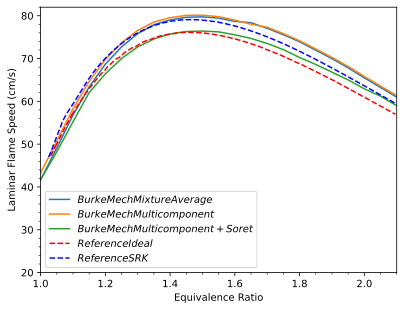

In [26]:
fig, ax1 = plt.subplots()
ax1.plot(phi,Su_ideal, label='$BurkeMech MixtureAverage$')
ax1.plot(phi,Su_multicomponent, label='$BurkeMech Multicomponent$')
ax1.plot(phi,Su_multiSoret, label='$BurkeMech Multicomponent+Soret$')
#ax1.plot(phi,Su_RK2, label='$CoolPropHEOS, Multicomponent+Soret$')
#ax1.plot(phi,Su_RK3, label='$H2O2mech, Idealgas$')
#ax1.plot(phi,Su_RK4, label='$H2O2mech, RedlichKwong$')
#ax1.plot(phi,Su_ideal, label='$BurkeMech, Mixture Average$')
ax1.plot(Law_Ideal['phi'], Law_Ideal['v'], 'r--', label='$Reference Ideal$')
ax1.plot(Law_SRK['phi'], Law_SRK['v'], 'b--', label='$Reference SRK$')
ax1.set_xlabel('Equivalence Ratio')
ax1.set_ylabel('Laminar Flame Speed (cm/s)')
ax1.set_xlim(1.0, 2.1)
ax1.set_ylim(20, 82)
ax1.set_yticks([20, 30, 40 ,50, 60, 70, 80])
ax1.minorticks_on()
plt.legend()
plt.savefig("Graphs/Lam_Speeds_phiVaried.svg")
plt.show()

There are clear differences compared to Law et als case.
This is not good

Using the full gri30 mech for the ideal case takes very long, so we prepare a reduced mech

In [15]:
gas_GRI = ct.Solution('gri30.yaml',thermo='ideal-gas')

# all species from Burke mech, minus Helium (not present in GRI):
species_names = ['H', 'H2', 'O', 'OH', 'H2O', 'O2', 'HO2', 'H2O2', 'N2', 'AR', 'CO', 'CO2'] 
species_list = [gas_GRI.species(name) for name in species_names]

# Create a new list of reactions that involve only the species of interest
reactions_to_keep = []
for i in gas_GRI.reactions():
    reactants = set(i.reactants.keys())  # Set of reactant species names
    products = set(i.products.keys())  # Set of product species names
    # Check if the reaction involves only species of interest
    if reactants.issubset(species_names) and products.issubset(species_names):
        reactions_to_keep.append(i)

# create the new reduced mechanism
gas_ideal = ct.Solution(thermo='ideal-gas', kinetics='gas', species=species_list, reactions=reactions_to_keep, transport_model='mixture-averaged')

# Output the reduced mechanism
print(f"Reduced mechanism contains {len(gas_ideal.species())} species and {len(gas_ideal.reactions())} reactions.")

Reduced mechanism contains 12 species and 34 reactions.
